In [5]:
#vaoy a usra este notebook para limpiar el dataframe EdaNoya contenido en final scraping schooldaysie.csv
#importo librerias 
import numpy as np
import pandas as pd


In [6]:
# 1 - lo abro y lee desde el CWD

df = pd.read_csv(r"C:\Users\cfern\Documents\GitHub\Noya-data23.01\2_Data_Analysis\entregables\EDA\ColegiosDublin.csv")
# vemos como nos ha quedado el dataframe y tenemos que tener cuidado con catchemet porque nos faltan datos 
#tenemos 10 columnas que contienen strings , de las cules en dos puedo sacr informacion numerica ; vamos a tratarlas una a una 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 196 entries, 0 to 195
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Unnamed: 0           196 non-null    int64 
 1   Zona                 196 non-null    object
 2   Titulo               196 non-null    object
 3   Teléfono             196 non-null    object
 4   Dirección            196 non-null    object
 5   Información General  196 non-null    object
 6   Principal            196 non-null    object
 7   Enrolment            196 non-null    object
 8   Ethos                196 non-null    object
 9   Catchment            166 non-null    object
 10  Fees                 196 non-null    object
dtypes: int64(1), object(10)
memory usage: 17.0+ KB


In [7]:
df.head()

,Unnamed: 0,Zona,Titulo,Teléfono,Dirección,Información General,Principal,Enrolment,Ethos,Catchment,Fees
0,0,Dublin-1,Belvedere College S.J.,Phone:_ 01-8586600,"6 Gt Denmark Street Dublin 1 ,Dublin City D0...",Post Primary School Roll number:_60520P e:_dr...,Principal:_Gerry Foley,Enrolment:_Boys:_1003 (2022/23),Ethos:_Catholic,:_North Inner City,"Fees:_Yes €6,530"
1,1,Dublin-1,Larkin Community College,Phone:_ 01-8741913,"Champions Avenue, Cathal Brugha Street Dublin...",Post Primary School Roll number:_76077O e:_in...,Principal:_Thomas Usher,Enrolment:_Boys:_204 Girls:_203 (2022/23),Ethos:_Inter Denominational,:_North Inner City,Fees:_No
2,2,Dublin-1,Mount Carmel Secondary School,Phone:_ 01-8730958,"Kings Inn Street, Dublin ,Dublin City D01W657",Post Primary School Roll number:_60853T e:_in...,Principal:_Mr Gerard Cullen,Enrolment:_Girls:_399 (2022/23),Ethos:_Catholic,:_North Inner City,Fees:_No
3,3,Dublin-1,O'connell School,Phone:_ 01-8748307,"North Richmond Street Dublin 1 ,Dublin City ...",Post Primary School Roll number:_60440R e:_se...,Principal:_Liam Newell,Enrolment:_Boys:_213 (2022/23),Ethos:_Catholic,:_North Inner City,Fees:_No
4,4,Dublin-2,Loreto College,Phone:_ 01-6618179,"53 St Stephens Green Dublin 2 ,Dublin City D...",Post Primary School Roll number:_60820E e:_in...,Principal:_Jacqueline Dempsey,Enrolment:_Girls:_570 (2022/23),Ethos:_Catholic,:_South Inner City,"Fees:_Yes €5,200"


In [8]:
#######################           TELEFONO       ##########################################
telefono = []
for i in df['Teléfono']:
    telefono.append(i.replace('Phone:_', ''))

df['Teléfono'] = telefono


In [9]:
#######################           INFORMACION GENERAL       ##########################################
Type_school=[]
Roll_number = []
email=[]
web=[]

for i in df['Información General']:
    Type_school.append(i.split("Roll number:_")[0])
    Roll_number.append(i.split('Roll number:_')[1].split(' e:')[0])
    
    try:
      web.append(i.split ("w:_")[1].split(" ")[0])
    except: 
      web.append(i)
    try:
      email.append(i.split ("e:_")[1].split(" ")[0])
    except: 
      email.append(i)

df['Roll number'] = Roll_number
df['Type of school'] = Type_school
df["email"]=email
df["web"]= web

del df['Información General']


In [10]:
#######################           PRINCIPAL       ##########################################

In [11]:
Principal_name=[]

for i in df['Principal']:
    Principal_name.append(i.replace("Principal:_",""))

df['Principal_name'] = Principal_name

del df["Principal"]



In [12]:
#######################           ENROLMENT ##########################################
enrolment2=[]

for i in df["Enrolment"]:
   enrolment2.append(i.replace ("(2022/23)","").replace("Enrolment:_",""))
df['Enrolment'] = enrolment2




In [13]:

# Si en la columna enrolment hay solos boys
chicos_solo =df.Enrolment[df.Enrolment.str.contains("Boys")].str.split(" ").replace(" ","").apply(lambda x: x[0])


In [14]:
# Si en la columna enrolment hay solos chicas 
chicas_solo =df.Enrolment[df.Enrolment.str.contains("Girls")&~df.Enrolment.str.contains("Boys") ].str.split(" ").replace("Boys:_ ","").apply(lambda x: x[0])


In [15]:
# Si en la columna enrolment hay boys and Girsl ; nos vamos a quedar solo con los chicos 
chicos_mixtos =df.Enrolment[df.Enrolment.str.contains("Boys") & df.Enrolment.str.contains("Girls")].str.split(" ").replace(" ","").apply(lambda x: x[0])



In [48]:
# Si en la columna enrolment hay boys and Girsl ; nos vamos a quedar solo con los chicas
chicas_mixtos = df.Enrolment[df.Enrolment.str.contains("Boys") & df.Enrolment.str.contains("Girls")].str.split(" ").apply(lambda x: x[1])


In [17]:
chicas_solo =chicas_solo.str[chicas_solo.str.find("_").to_list()[0]+1:]
chicos_solo =chicos_solo.str[chicos_solo.str.find("_").to_list()[0]+1:]
chicas_mixtos=chicas_mixtos.str[chicas_mixtos.str.find("_").to_list()[0]+1:]
chicos_mixtos=chicos_mixtos.str[chicos_mixtos.str.find("_").to_list()[0]+1:]



In [18]:
###Vamos a juntar las series 
B =pd.DataFrame(chicos_solo)
BM=pd.DataFrame(chicos_mixtos)

BOYS=pd.merge(B,BM, how='left',left_index=True,right_index=True)
 

In [19]:
df2=pd.merge(df,BOYS,how="left",left_index=True,right_index=True)
df2.head()
df2.rename(columns={"Enrolment_x":'Boys',
                        'Enrolment_y':'BM'},
               inplace=True)


In [20]:
G =pd.DataFrame(chicas_solo)
GM=pd.DataFrame(chicas_mixtos)



In [21]:
df3=pd.merge(df2,G,how="left",left_index=True,right_index=True)
df3.rename(columns={"Enrolment_y":'Girls_only'},inplace=True)
df4=pd.merge(df3,GM,how="left",left_index=True,right_index=True)
df4.rename(columns={"Enrolment":'GM'},inplace=True)


In [22]:
df4.fillna(0,inplace=True)


In [23]:
df4["Girls_only"] = df4["Girls_only"].astype(int)
df4["GM"]=df4["GM"].astype(int)
df4["Boys"]=df4["Boys"].astype(int)
df4 ["Girls"] = df4["Girls_only"]+df4["GM"]


In [24]:
del df4["Enrolment_x"]



In [25]:
###############################                FEES           ###########################################


In [26]:
Fees = []
for i in df4['Fees']:
    Fees.append(i.replace ('Fees:_Yes','').replace("Fees:_No","").replace("Fees:","").replace("€","").replace(",",".").strip())
df4['Fees'] = Fees

In [27]:
df4['Fees']=df4["Fees"].replace(r'\s+', np.nan, regex=True)
df4.Fees.replace ("", value="Nada", inplace=True,regex=True)
df4.Fees.replace ("Nada", value=0, inplace=True,regex=True)
df4.Fees.fillna(0,inplace=True)
df4.Fees=df4.Fees.astype(float)*1000

In [28]:
###############################                CATCHMENT          ###########################################

In [29]:

Catchment=[]

for i in df4["Catchment"]:
   try:
      Catchment.append(i.replace (":_",""))
   except: 
      Catchment.append(i)

df4["Catchment"] = Catchment
df4.Catchment.fillna(0,inplace=True)


In [30]:
#######################           ETHOS       ##########################################


In [31]:
#limpiamos Ethos 
ethos=[]

for i in df4['Ethos']:
    ethos.append(i.replace("Ethos:_","").replace("-","").strip())

df4['Religion'] = ethos
del df4["Ethos"]


In [32]:
df4.Religion[df4.Religion.str.contains("Catholic targeted Educational Initiative ,Parish:_Parish Priorswood")]

Series([], Name: Religion, dtype: object)

In [33]:
#Hay un valor erroneo del scraping ; lo cmabio por o
df4.Religion[135]=df4.Religion[135].replace("Enrolment:_Boys:_234 Girls:_148    (2022/23)","0")
df4.Religion[135]=df4.Religion[135].replace("Enrolment:_Boys:_234 Girls:_148    (2022/23)","0")
df4.Religion

C:\Users\cfern\AppData\Local\Temp\ipykernel_32052\2575876129.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.Religion[135]=df4.Religion[135].replace("Enrolment:_Boys:_234 Girls:_148    (2022/23)","0")
C:\Users\cfern\AppData\Local\Temp\ipykernel_32052\2575876129.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.Religion[135]=df4.Religion[135].replace("Enrolment:_Boys:_234 Girls:_148    (2022/23)","0")


0                  Catholic
1      Inter Denominational
2                  Catholic
3                  Catholic
4                  Catholic
               ...         
191                Catholic
192    Inter Denominational
193    Inter Denominational
194                Catholic
195    Multi Denominational
Name: Religion, Length: 196, dtype: object

In [34]:
#se me ha colado un espacio en una categoria y hay que quitarlo
new_religion = []

for i in df4.Religion:
    if "MultiDenominational" in i:
        new_religion.append(i.replace("MultiDenominational","Multi Denominational"))
    elif"Catholic targeted Educational Initiative ,Parish:_Parish Priorswood" in i :
        new_religion.append(i.replace("Catholic targeted Educational Initiative ,Parish:_Parish Priorswood","Catholic"))
    else:
        new_religion.append(i)
new_religion
df4.Religion= new_religion

In [35]:
df4.rename(columns={"Unnamed: 0":'n_colegio'},inplace=True)

In [50]:
df4.head()

,n_colegio,Zona,Titulo,Teléfono,Dirección,Catchment,Fees,Roll number,Type of school,email,web,Principal_name,Boys,BM,Girls_only,GM,Girls,Religion
0,0,Dublin-1,Belvedere College S.J.,01-8586600,"6 Gt Denmark Street Dublin 1 ,Dublin City D0...",North Inner City,6530.0,60520P,Post Primary School,dreddy@belvederecollege.ie,www.belvederecollege.ie,Gerry Foley,1003,0,0,0,0,Catholic
1,1,Dublin-1,Larkin Community College,01-8741913,"Champions Avenue, Cathal Brugha Street Dublin...",North Inner City,0.0,76077O,Post Primary School,info@larkincommunitycollege.ie,www.larkincommunitycollege.ie,Thomas Usher,204,204,0,203,203,Inter Denominational
2,2,Dublin-1,Mount Carmel Secondary School,01-8730958,"Kings Inn Street, Dublin ,Dublin City D01W657",North Inner City,0.0,60853T,Post Primary School,info@mountcarmel.ie,mountcarmelsecondaryschool.ie,Mr Gerard Cullen,0,0,399,0,399,Catholic
3,3,Dublin-1,O'connell School,01-8748307,"North Richmond Street Dublin 1 ,Dublin City ...",North Inner City,0.0,60440R,Post Primary School,secretary@oconnellschool.ie,oconnellschool.ie,Liam Newell,213,0,0,0,0,Catholic
4,4,Dublin-2,Loreto College,01-6618179,"53 St Stephens Green Dublin 2 ,Dublin City D...",South Inner City,5200.0,60820E,Post Primary School,info@loretothegreen.ie,www.loretothegreen.ie,Jacqueline Dempsey,0,0,570,0,570,Catholic


In [36]:
#Lo guardamos a excel para tratarlo con Tableau
df4.to_excel('df2_limpio.xlsx')


In [37]:
#####################   CREO DOS NUEVAS COLUMNAS BINARIAS PARA LAS GRAFICAS con seaborn  SEX Y FEESY_N #################


In [38]:
df5=df4.copy()
df5.Fees[(df5.Fees>0.0)]=1
df5.Girls[(df5.Girls>0.0)]=1
df5.Girls[(df5.Girls>0.0)&(df5.GM>0.0)]=2
df5.Religion[(df5.Religion == "Catholic" )]=1
df5.Religion[(df5.Religion == "Multi Denominational" )]=2
df5.Religion[(df5.Religion == "Inter Denominational" )]=3
df5.Religion[(df5.Religion == "Jewish" )]=4
df5.Religion[(df5.Religion == "0" )]=0
df5.Religion[(df5.Religion == "Church Of Ireland" )]=5
df5.Religion[(df5.Religion == "Methodist" )]=5
df5["Total"]= df5.Girls+df5.Boys

df6=df5.loc[:,["Zona","Fees","Girls","Religion","Total","Titulo"]]

df6.rename(columns={"Fees":'FeesY_N','Girls':'Gender',
                    "Religion":"Tipo_Religion"}, inplace=True)
df6

C:\Users\cfern\AppData\Local\Temp\ipykernel_32052\272702036.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.Fees[(df5.Fees>0.0)]=1
C:\Users\cfern\AppData\Local\Temp\ipykernel_32052\272702036.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.Girls[(df5.Girls>0.0)]=1
C:\Users\cfern\AppData\Local\Temp\ipykernel_32052\272702036.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5.Girls[(df5.Girls>0.0)&(df5.GM>0.0)]=2
C:\Us

,Zona,FeesY_N,Gender,Tipo_Religion,Total,Titulo
0,Dublin-1,1.0,0,1,1003,Belvedere College S.J.
1,Dublin-1,0.0,2,3,206,Larkin Community College
2,Dublin-1,0.0,1,1,1,Mount Carmel Secondary School
3,Dublin-1,0.0,0,1,213,O'connell School
4,Dublin-2,1.0,1,1,1,Loreto College
...,...,...,...,...,...,...
191,Dublin-west-county-dublin,0.0,1,1,1,St Josephs College
192,Dublin-west-county-dublin,0.0,2,3,312,Collinstown Park Community College
193,Dublin-west-county-dublin,0.0,2,3,123,Coláiste De Hide
194,Dublin-west-county-dublin,0.0,0,1,620,Coláiste Phádraig Cbs


In [39]:
#lo guardo en excell para subirlo a mi proyecto Tableau y combinarlo con df2 limpio
df6.to_excel('df1categorias.xlsx')

In [40]:
#find a school 
#filtro=df4[df4.Catchment.str.contains("Blacrock",case=False)]

In [41]:
##############################         VAMOS A DIBUJAR            ######################################

In [42]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
sns.set(color_codes=True)
sns.color_palette("pastel")

[(0.6313725490196078, 0.788235294117647, 0.9568627450980393),
 (1.0, 0.7058823529411765, 0.5098039215686274),
 (0.5529411764705883, 0.8980392156862745, 0.6313725490196078),
 (1.0, 0.6235294117647059, 0.6078431372549019),
 (0.8156862745098039, 0.7333333333333333, 1.0),
 (0.8705882352941177, 0.7333333333333333, 0.6078431372549019),
 (0.9803921568627451, 0.6901960784313725, 0.8941176470588236),
 (0.8117647058823529, 0.8117647058823529, 0.8117647058823529),
 (1.0, 0.996078431372549, 0.6392156862745098),
 (0.7254901960784313, 0.9490196078431372, 0.9411764705882353)]

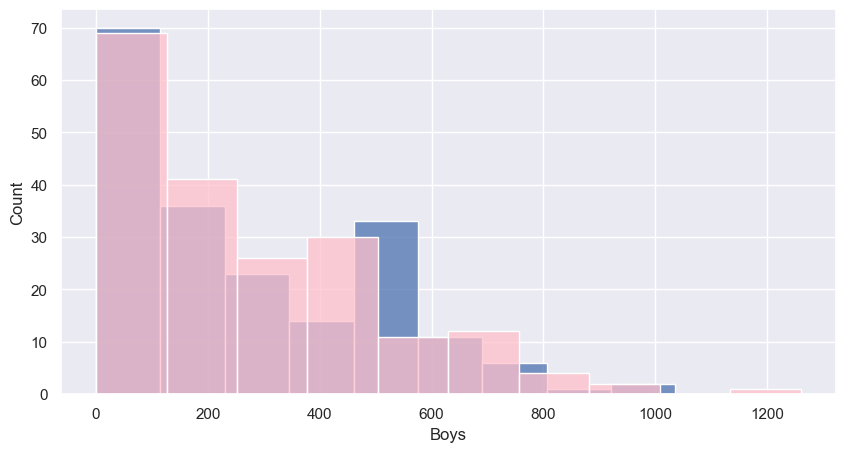

In [44]:

#¿Como se diatribuyen los datos del numero  de chicas y chicos  por colegio ? plt.figure(figsize=(10,5))
sns.histplot(df4["Boys"], kde=False, color = "b")
sns.histplot(df4["Girls"], kde=False, color = "pink");
#comparamos la distribucion de los colegios en nº de niñas y niños 

C:\Users\cfern\AppData\Local\Temp\ipykernel_32052\2855187073.py:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


C:\Users\cfern\AppData\Local\Temp\ipykernel_32052\2855187073.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




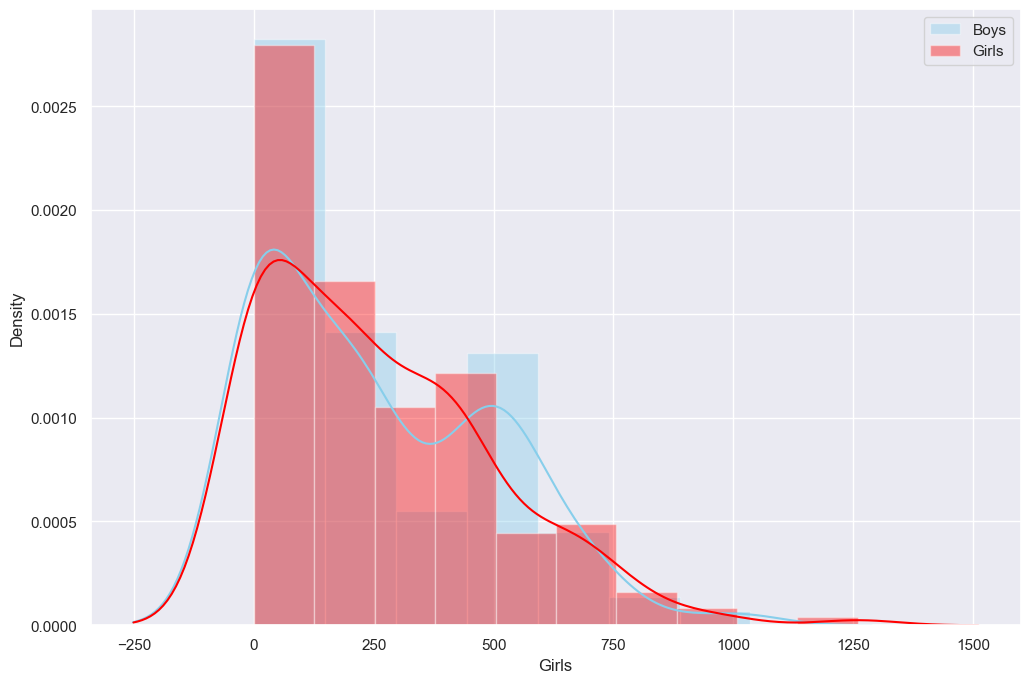

In [59]:
#¿Como se diatribuyen los datos del numero  de chicas y chicos  por colegio ? 
plt.figure(figsize=(12,8))
sns.distplot(df4["Boys"] , color="skyblue", label="Boys")


<Axes: xlabel='count', ylabel='Zona'>

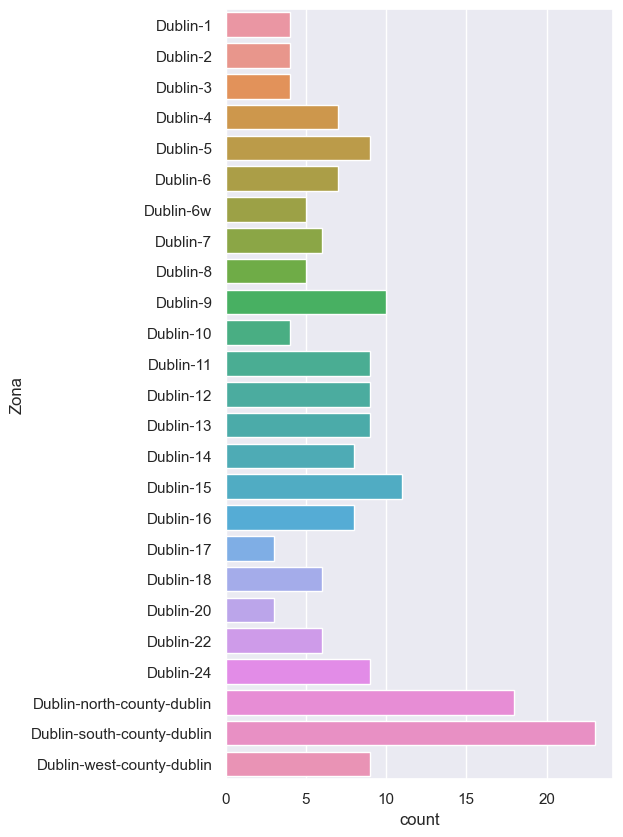

In [45]:
# ¿que zonas tiene más colegios?
plt.figure(figsize=(5,10))
sns.countplot(y = df4["Zona"],label="Zona",orient = "v")

Catholic                                                         104
Inter Denominational                                              55
Multi Denominational                                              19
Church Of Ireland                                                 10
                                                                   4
Jewish                                                             1
Methodist                                                          1
Catholic  Targeted Educational Initiative, Parish:_Priorswood      1
0                                                                  1
Name: Religion, dtype: int64
Circle(xy=(0, 0), radius=0.7)


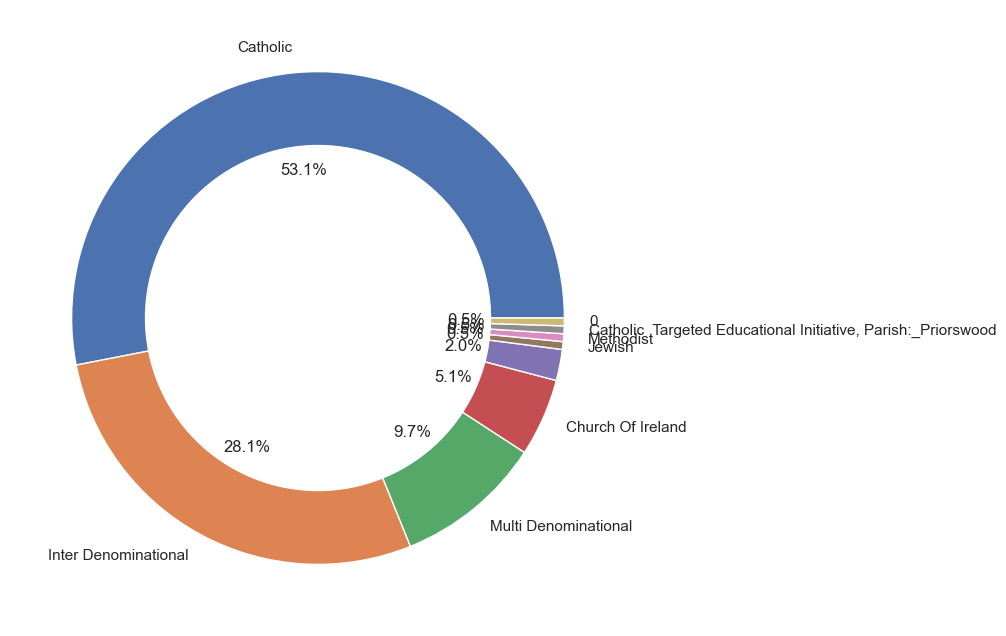

In [46]:
data = df4["Religion"].value_counts()   ## cuantos colegios por  religiones hay
print(data)
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white') ##origen , radio , color  
print(my_circle)

plt.figure(figsize=(8,8))
plt.pie(data.values,
        labels=data.index,
        autopct='%1.1f%%') #sacame 2 decimales 
p=plt.gcf() # get curent figure gct 
p.gca().add_artist(my_circle)  # gca get curent axes ;add_artist .... pinto un circulo blanco dentro de la tarta
plt.show()

In [51]:
# ¿Los colegios de pago son toods educacion diferenciada ? No hay 8 colegios mixtos de pago 
pd.crosstab(df6["Gender"],
df6["FeesY_N"])

FeesY_N,0.0,1.0
Gender,,
0,36,9
1,37,10
2,96,8


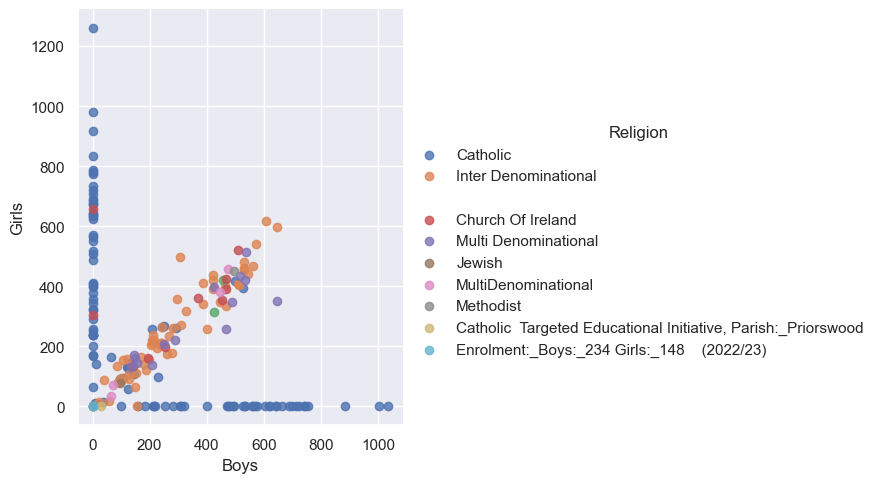

In [ ]:
#Y esos colegios mixtos de que religión son?
# vemos al cruzar religion y genero como la mayor parte de los colegios catolicos se alinean en los ejes , es decir son educación diferenciada 
sns.lmplot(x='Boys', y='Girls', data=df4,fit_reg=False, hue ="Religion");